<a href="https://colab.research.google.com/github/da3gal/vidio-playstore-scraping-sentiment/blob/main/Proyek_Analisis_Sentimen_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scraping

In [ ]:
pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import app, reviews_all, Sort
import csv
import pandas as pd
import requests

In [ ]:
scrapreview = reviews_all(
    'com.vidio.android',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=20000
)

In [ ]:
with open('review_app', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])
    for review in scrapreview:
        writer.writerow([review['content']])

In [ ]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('ulasan_aplikasi.csv', index=False)

app_reviews_df = pd.DataFrame(scrapreview)

jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

# Verify Data

In [ ]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,10240ff7-ca30-4a92-bd0f-aa9a1a176800,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sangat mengecewakan karena beberapa siaran di ...,3,2,6.44.9-cb9acb65af,2025-01-09 11:36:31,"Halo, Fajar. Mohon maaf atas ketidaknyamananny...",2025-01-09 12:42:47,6.44.9-cb9acb65af
1,229f5dca-2072-4fa4-84ba-c06050ae17ef,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Izin saran.. 1. Kalau bisa di Aplikasi Video T...,4,4,6.43.9-8ec34856ef,2025-01-07 00:45:00,"Hallo Kak Rohandy. Terima kasih bintang 4 nya,...",2025-01-07 06:14:14,6.43.9-8ec34856ef
2,fc22e970-88de-44fa-8c8d-2f7645734383,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Platform nonton yang kurang memuaskan. Karena ...,3,17,6.43.9-8ec34856ef,2025-01-01 11:26:58,"Hai, Sahabat Vidio. Kami sangat berterima kasi...",2025-01-01 11:37:56,6.43.9-8ec34856ef
3,95bbf4b2-ddfe-49d7-bf31-3fe1f87aba6c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Gak lagi2 deh aku langganan Vidio, lagi asik2 ...",1,720,6.43.9-8ec34856ef,2024-12-23 06:00:58,Hai kak Hidayati. Mohon maaf atas ketidaknyama...,2024-12-23 08:22:16,6.43.9-8ec34856ef
4,89f13108-bf16-41ed-9815-7140af8630b4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Yang saya rasakan selama satu bulan pemakaian,...",2,222,6.43.9-8ec34856ef,2024-12-17 13:56:53,Hai kak Akan. Mohon maaf atas ketidaknyamanan ...,2024-12-17 15:32:56,6.43.9-8ec34856ef


In [ ]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186433 entries, 0 to 186432
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              186433 non-null  object        
 1   userName              186433 non-null  object        
 2   userImage             186433 non-null  object        
 3   content               186410 non-null  object        
 4   score                 186433 non-null  int64         
 5   thumbsUpCount         186433 non-null  int64         
 6   reviewCreatedVersion  126854 non-null  object        
 7   at                    186433 non-null  datetime64[ns]
 8   replyContent          163671 non-null  object        
 9   repliedAt             163671 non-null  datetime64[ns]
 10  appVersion            126854 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 15.6+ MB


In [ ]:
app_reviews_df.duplicated().sum()

0

In [ ]:
app_reviews_df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,23
score,0
thumbsUpCount,0
reviewCreatedVersion,59579
at,0
replyContent,22762
repliedAt,22762


In [ ]:
clean_df = app_reviews_df.dropna()

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115850 entries, 0 to 158305
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              115850 non-null  object        
 1   userName              115850 non-null  object        
 2   userImage             115850 non-null  object        
 3   content               115850 non-null  object        
 4   score                 115850 non-null  int64         
 5   thumbsUpCount         115850 non-null  int64         
 6   reviewCreatedVersion  115850 non-null  object        
 7   at                    115850 non-null  datetime64[ns]
 8   replyContent          115850 non-null  object        
 9   repliedAt             115850 non-null  datetime64[ns]
 10  appVersion            115850 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 10.6+ MB


# Preprocessing

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.2 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def cleaningText(text):
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()

    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
url = "https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/refs/heads/master/kamus/kbba.txt"
response = requests.get(url)

slangwords_data = response.text
slangwords = {}
for line in slangwords_data.strip().split('\n'):
    parts = line.split(maxsplit=1)
    if len(parts) == 2:
        slang, fix = parts
        slangwords[slang.strip()] = fix.strip()

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

<ipython-input-16-58d3c2d22f2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
<ipython-input-16-58d3c2d22f2a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
<ipython-input-16-58d3c2d22f2a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

# Labeling

In [ ]:
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''

    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    else:
        polarity = 'neutral'

    return score, polarity

In [ ]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    46785
positive    38300
neutral     30765
Name: count, dtype: int64


<ipython-input-19-97aab24229b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['polarity_score'] = results[0]
<ipython-input-19-97aab24229b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['polarity'] = results[1]


# Feature Extraction & Modeling

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
X = clean_df['text_akhir']
y = clean_df['polarity']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

### TF-IDF

In [ ]:
# TF-IDF

tfidf = TfidfVectorizer(max_features=100, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=432)

models = {
    'Naive Bayes': BernoulliNB(),
    'SVM': SVC(kernel='linear', random_state=432),
    'Random Forest': RandomForestClassifier(random_state=432),
    'XGBoost': xgb.XGBClassifier(random_state=432),
    'LightGBM': lgb.LGBMClassifier(random_state=432)
}

print("Results with TF-IDF:")

for model_name, model in models.items():
    model.fit(X_train_tfidf.toarray(), y_train)
    y_pred_train = model.predict(X_train_tfidf.toarray())
    y_pred_test = model.predict(X_test_tfidf.toarray())

    accuracy_train = accuracy_score(y_pred_train, y_train)
    accuracy_test = accuracy_score(y_pred_test, y_test)

    print(f'{model_name} - accuracy_train: {accuracy_train}')
    print(f'{model_name} - accuracy_test: {accuracy_test}')
    print('-' * 50)

Results with TF-IDF:
Naive Bayes - accuracy_train: 0.8152999568407423
Naive Bayes - accuracy_test: 0.8147604661199828
--------------------------------------------------
SVM - accuracy_train: 0.8373974967630556
SVM - accuracy_test: 0.8351747949935261
--------------------------------------------------
Random Forest - accuracy_train: 0.9028916702632714
Random Forest - accuracy_test: 0.8319810099266293
--------------------------------------------------
XGBoost - accuracy_train: 0.8535498489425982
XGBoost - accuracy_test: 0.8368580060422961
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.095919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24594
[LightGBM] [Info] Number of data points in the train set: 92680, number of used features: 100
[LightGBM] [Info] Start training from score -0.905692
[LightGBM] [Info] Start training from score -1.324376
[LightGBM] [Info] Start training from score -1.109363


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM - accuracy_train: 0.8479823047043591
LightGBM - accuracy_test: 0.8372032801035822
--------------------------------------------------


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

X_train_tfidf_rnn, X_test_tfidf_rnn = train_test_split(X_tfidf.toarray(), test_size=0.2, random_state=432)

rnn_tfidf = Sequential()
rnn_tfidf.add(Dense(128, input_dim=X_train_tfidf_rnn.shape[1], activation='relu'))
rnn_tfidf.add(Dropout(0.2))
rnn_tfidf.add(Dense(64, activation='relu'))
rnn_tfidf.add(Dropout(0.2))
rnn_tfidf.add(Dense(32, activation='relu'))
rnn_tfidf.add(Dense(3, activation='softmax'))

rnn_tfidf.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

rnn_tfidf.fit(X_train_tfidf_rnn, y_train_one_hot, epochs=5, batch_size=64, validation_data=(X_test_tfidf_rnn, y_test_one_hot))

train_loss, train_accuracy = rnn_tfidf.evaluate(X_train_tfidf_rnn, y_train_one_hot)
test_loss, test_accuracy = rnn_tfidf.evaluate(X_test_tfidf_rnn, y_test_one_hot)

print(f"RNN with TF-IDF - accuracy_train: {train_accuracy}")
print(f"RNN with TF-IDF - accuracy_test: {test_accuracy}")

Epoch 1/5
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7667 - loss: 0.5932 - val_accuracy: 0.8366 - val_loss: 0.4661
Epoch 2/5
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8373 - loss: 0.4659 - val_accuracy: 0.8387 - val_loss: 0.4610
Epoch 3/5
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8428 - loss: 0.4540 - val_accuracy: 0.8382 - val_loss: 0.4657
Epoch 4/5
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8399 - loss: 0.4620 - val_accuracy: 0.8399 - val_loss: 0.4555
Epoch 5/5
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8431 - loss: 0.4507 - val_accuracy: 0.8418 - val_loss: 0.4552
2897/2897 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8450 - loss: 0.4439
725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8394 - loss: 0.4570
RNN with TF-IDF - accuracy_train: 0.8467954397201538
RNN with TF-IDF - accuracy_test: 0.8417781591415405


### Word2Vec

In [ ]:
# Word2Vec

tokenized_data = [word_tokenize(sentence.lower()) for sentence in X]
word2vec_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

def get_sentence_vector(sentence, model):
    tokens = word_tokenize(sentence.lower())
    word_vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

X_word2vec = np.array([get_sentence_vector(sentence, word2vec_model) for sentence in X])

X_train_word2vec, X_test_word2vec, y_train, y_test = train_test_split(X_word2vec, y_encoded, test_size=0.2, random_state=432)

print("Results with Word2Vec:")

models = {
    'Naive Bayes': BernoulliNB(),
    'SVM': SVC(kernel='linear', random_state=432),
    'Random Forest': RandomForestClassifier(random_state=432),
    'XGBoost': xgb.XGBClassifier(random_state=432),
    'LightGBM': lgb.LGBMClassifier(random_state=432)
}

for model_name, model in models.items():
    model.fit(X_train_word2vec, y_train)
    y_pred_train = model.predict(X_train_word2vec)
    y_pred_test = model.predict(X_test_word2vec)

    accuracy_train = accuracy_score(y_pred_train, y_train)
    accuracy_test = accuracy_score(y_pred_test, y_test)

    print(f'{model_name} - accuracy_train: {accuracy_train}')
    print(f'{model_name} - accuracy_test: {accuracy_test}')
    print('-' * 50)

Results with Word2Vec:
Naive Bayes - accuracy_train: 0.6152460077686663
Naive Bayes - accuracy_test: 0.6136814846784635
--------------------------------------------------
SVM - accuracy_train: 0.8136599050496331
SVM - accuracy_test: 0.8126025032369443
--------------------------------------------------
Random Forest - accuracy_train: 1.0
Random Forest - accuracy_test: 0.8375917134225291
--------------------------------------------------
XGBoost - accuracy_train: 0.916573154941735
XGBoost - accuracy_test: 0.8438929650410013
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.200304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25498
[LightGBM] [Info] Number of data points in the train set: 92680, number of used features: 100
[LightGBM] [Info] Start training from score -0.905692
[LightGBM] [Info] Start training from score -1.324376
[LightGBM] [Info] Start training from score -1.109363


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM - accuracy_train: 0.8605416486836427
LightGBM - accuracy_test: 0.8315062580923608
--------------------------------------------------


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

X_train_word2vec_rnn, X_test_word2vec_rnn = train_test_split(X_word2vec, test_size=0.2, random_state=432)

rnn_word2vec = Sequential()
rnn_word2vec.add(Dense(128, input_dim=X_train_word2vec_rnn.shape[1], activation='relu'))
rnn_word2vec.add(Dropout(0.2))
rnn_word2vec.add(Dense(64, activation='relu'))
rnn_word2vec.add(Dropout(0.2))
rnn_word2vec.add(Dense(32, activation='relu'))
rnn_word2vec.add(Dense(3, activation='softmax'))

rnn_word2vec.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

rnn_word2vec.fit(X_train_word2vec_rnn, y_train_one_hot, epochs=5, batch_size=64, validation_data=(X_test_word2vec_rnn, y_test_one_hot))

train_loss, train_accuracy = rnn_word2vec.evaluate(X_train_word2vec_rnn, y_train_one_hot)
test_loss, test_accuracy = rnn_word2vec.evaluate(X_test_word2vec_rnn, y_test_one_hot)

print(f"RNN with Word2Vec - accuracy_train: {train_accuracy}")
print(f"RNN with Word2Vec - accuracy_test: {test_accuracy}")

Epoch 1/5
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7153 - loss: 0.6590 - val_accuracy: 0.7991 - val_loss: 0.4791
Epoch 2/5
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7978 - loss: 0.4868 - val_accuracy: 0.8174 - val_loss: 0.4478
Epoch 3/5
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8116 - loss: 0.4558 - val_accuracy: 0.8289 - val_loss: 0.4208
Epoch 4/5
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8187 - loss: 0.4419 - val_accuracy: 0.8309 - val_loss: 0.4128
Epoch 5/5
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8243 - loss: 0.4310 - val_accuracy: 0.8352 - val_loss: 0.4032
2897/2897 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8423 - loss: 0.3940
725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8345 - loss: 0.4031
RNN with Word2Vec - accuracy_train: 0.8415623903274536
RNN with Word2Vec - accuracy_test: 0.8352179527282715


## Hypermarameter Tuning

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.3 MB/s eta 0:00:00


In [ ]:
import optuna

def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 50, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
    }

    model = xgb.XGBClassifier(**param, random_state=432)
    model.fit(X_train_tfidf.toarray(), y_train)

    y_pred_train = model.predict(X_train_tfidf.toarray())
    y_pred_test = model.predict(X_test_tfidf.toarray())

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    return accuracy_test

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print(f"Best trial: {study.best_trial}")
print(f"Best parameters: {study.best_trial.params}")

[I 2025-01-11 12:28:13,098] A new study created in memory with name: no-name-3c08aae8-70bc-4d63-9538-efcf16cdf4c6
<ipython-input-37-0628726f5a53>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),  # log scale
<ipython-input-37-0628726f5a53>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
<ipython-input-37-0628726f5a53>:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsampl

Best trial: FrozenTrial(number=21, state=TrialState.COMPLETE, values=[0.8374190763918861], datetime_start=datetime.datetime(2025, 1, 11, 12, 38, 28, 994840), datetime_complete=datetime.datetime(2025, 1, 11, 12, 39, 6, 779430), params={'learning_rate': 0.0987380686701731, 'n_estimators': 149, 'max_depth': 10, 'subsample': 0.8293817147120643, 'colsample_bytree': 0.7013094776202294}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.1, log=True, low=0.01, step=None), 'n_estimators': IntDistribution(high=150, log=False, low=50, step=1), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'subsample': FloatDistribution(high=1.0, log=False, low=0.7, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.7, step=None)}, trial_id=21, value=None)
Best parameters: {'learning_rate': 0.0987380686701731, 'n_estimators': 149, 'max_depth': 10, 'subsample': 0.8293817147120643, 'colsample_bytree': 0.701309

## WordCloud Visualize

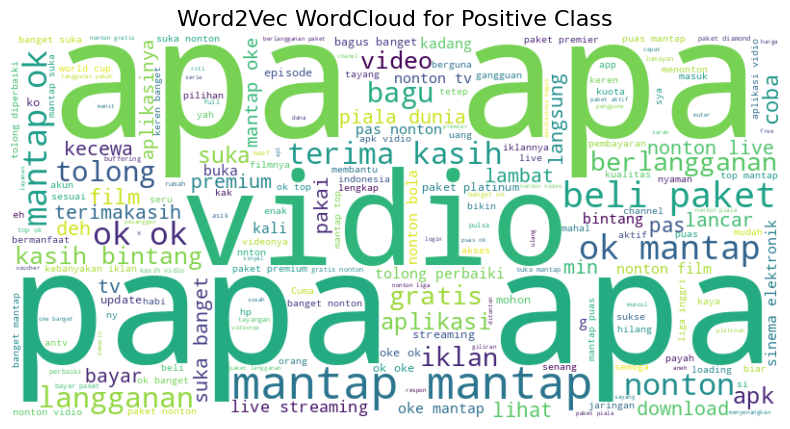

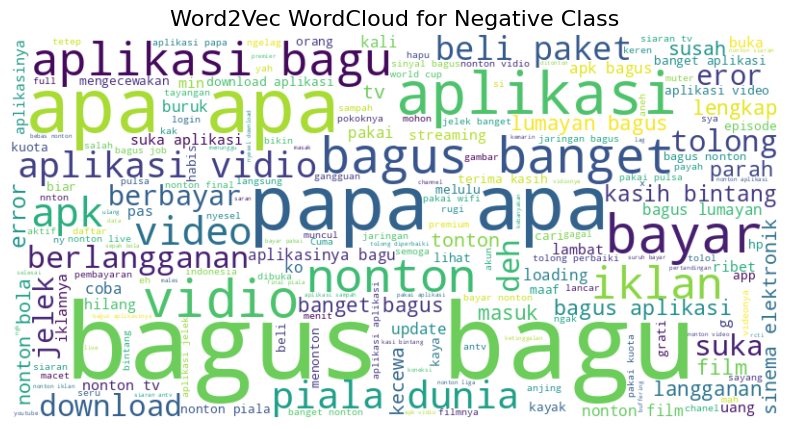

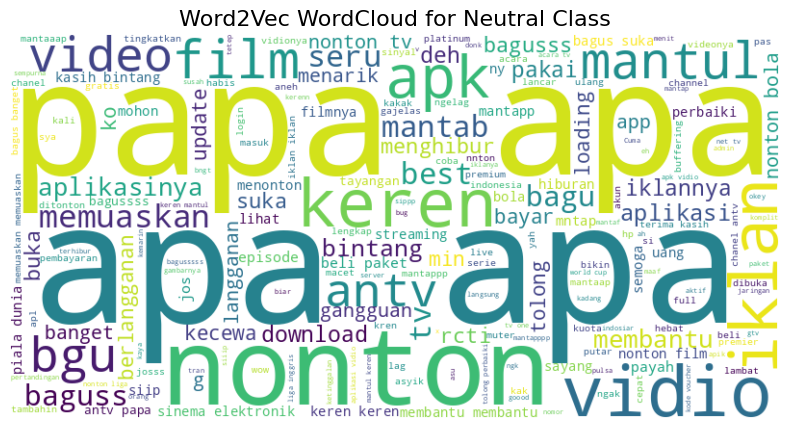

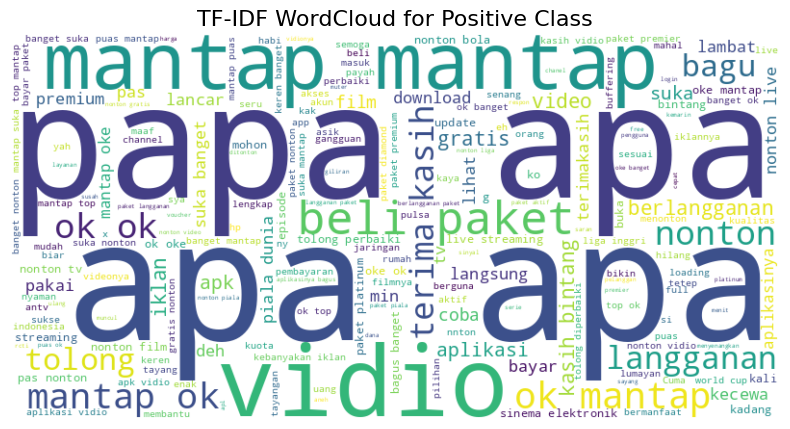

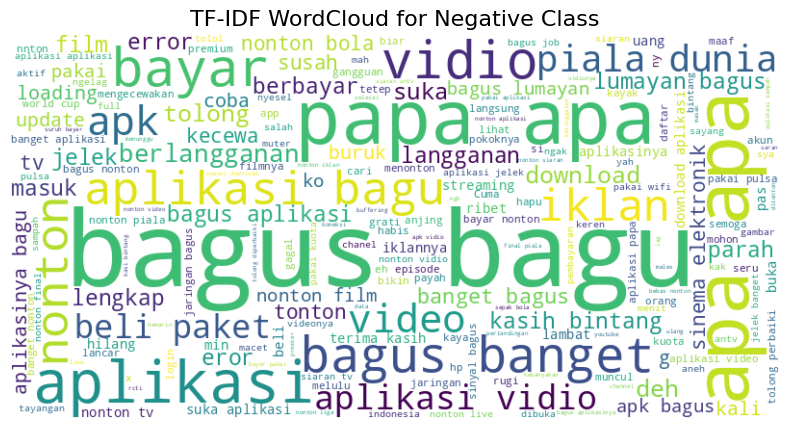

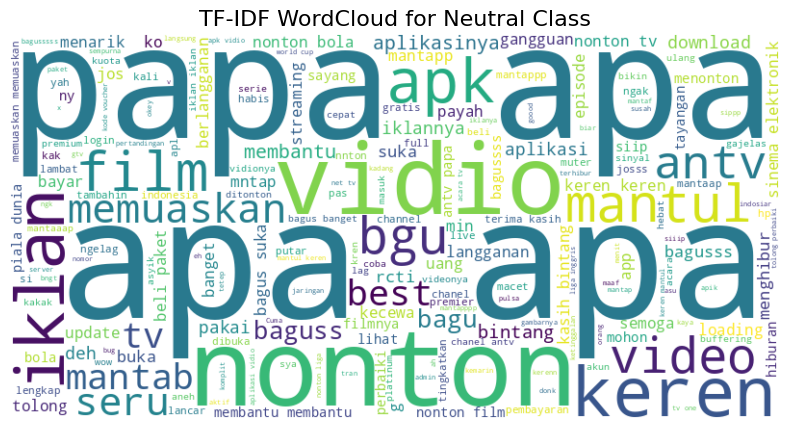

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

classes = ['positive', 'negative', 'neutral']
for cls in classes:
    class_texts = clean_df[clean_df['polarity'] == cls]['text_akhir']
    create_wordcloud(class_texts, f"Word2Vec WordCloud for {cls.capitalize()} Class")

for cls in classes:
    class_indices = clean_df[clean_df['polarity'] == cls].index
    class_texts = X[class_indices]
    create_wordcloud(class_texts, f"TF-IDF WordCloud for {cls.capitalize()} Class")

# Save Model

In [ ]:
import joblib
import os

os.makedirs("saved_models", exist_ok=True)

# Save TF-IDF model
joblib.dump(tfidf, "saved_models/tfidf_model.pkl")

# Save Word2Vec model
word2vec_model.save("saved_models/word2vec_model.bin")

for model_name, model in models.items():
    joblib.dump(model, f"saved_models/{model_name}_model.pkl")

In [ ]:
# Load TF-IDF model
tfidf_loaded = joblib.load("saved_models/tfidf_model.pkl")

# Load Word2Vec model
word2vec_loaded = Word2Vec.load("saved_models/word2vec_model.bin")

loaded_models = {}
for model_name in models.keys():
    loaded_models[model_name] = joblib.load(f"saved_models/{model_name}_model.pkl")

In [ ]:
!pip freeze > requirements.txt

In [ ]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Testing

In [ ]:
def classify_text_multiclass(text, model, vectorizer=None, word2vec_model=None, method='tfidf'):
    if method == 'tfidf':
        # transform teks menggunakan TF-IDF vectorizer
        processed_text = vectorizer.transform([text]).toarray()
    elif method == 'word2vec':
        # transform teks menggunakan Word2Vec
        processed_text = np.array([get_sentence_vector(text, word2vec_model)])
    else:
        raise ValueError("Method harus 'tfidf' atau 'word2vec'")

    # probabilitas untuk setiap kelas
    pred_proba = model.predict_proba(processed_text)[0]
    class_labels = label_encoder.inverse_transform(range(len(pred_proba)))

    # dictionary hasil prediksi
    predictions = {class_label: prob for class_label, prob in zip(class_labels, pred_proba)}
    predicted_class = max(predictions, key=predictions.get)

    return {
        "predicted_class": predicted_class,
        "probabilities": predictions
    }

In [ ]:
new_text = "Film yang saya tonton di Vidio sangat seru dan menyenangkan, namun kualitas gambar kadang-kadang buram, jadi saya merasa kecewa sedikit."

# TF-IDF
tfidf_result = classify_text_multiclass(
    text=new_text,
    model=loaded_models['XGBoost'],  # Model terbaik
    vectorizer=tfidf_loaded,
    method='tfidf'
)

# Word2Vec
word2vec_result = classify_text_multiclass(
    text=new_text,
    model=loaded_models['XGBoost'],  # Model terbaik
    word2vec_model=word2vec_loaded,
    method='word2vec'
)

print("Hasil prediksi (TF-IDF):")
print(f"Predicted Class: {tfidf_result['predicted_class']}")
print(f"Probabilities: {tfidf_result['probabilities']}")

print("\nHasil prediksi (Word2Vec):")
print(f"Predicted Class: {word2vec_result['predicted_class']}")
print(f"Probabilities: {word2vec_result['probabilities']}")

Hasil prediksi (TF-IDF):
Predicted Class: neutral
Probabilities: {'negative': 0.01, 'neutral': 0.99, 'positive': 0.0}

Hasil prediksi (Word2Vec):
Predicted Class: positive
Probabilities: {'negative': 0.44, 'neutral': 0.07, 'positive': 0.49}
